## Аналитика среднемесячной номинальной начисленной заработной платы работников организаций экономической деятельности в Российской Федерации за 2000-2023 гг.
- Рыболовство, рыбоводство.
- Строительство.
- Образование.

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Убираю ограничение по столбцам
pd.set_option('display.max_columns', None)

### Работа с ExcelFile

In [3]:
# # Чтение файла
# xlsz_data = pd.ExcelFile('data/tab3-zpl_2023.xlsx')

# # Создание датафреймов
# sheet1_df = xlsz_data.parse('с 2017 г.')
# sheet2_df = xlsz_data.parse('2000-2016 гг.')

# # удаляю ненужные строки
# sheet1_df.drop([0, 1, 2, 3, 6, 11, 16, 57, 58, 59], inplace=True)
# sheet2_df.drop([0, 1, 6, 10, 37, 38], inplace=True)

# # Название колонок
# new_columns_1 = ["Наименование", "2017(1)", "2018", "2019", "2020",
#               "2021", "2022(2)", "2023(2, 3)"]
# new_columns_2 = ["Наименование", "2000", "2001", "2002", "2003", "2004",
#               "2005", "2006", "2007", "2008", "2009", "2010",
#               "2011", "2012", "2013", "2014", "2015", "2016"]
# sheet1_df.columns = new_columns_1
# sheet2_df.columns = new_columns_2

# # Переиндексация
# sheet1_df.reset_index(inplace=True, drop=True)
# sheet2_df.reset_index(inplace=True, drop=True)

# # Сохраняю в csv
# sheet1_df.to_csv('data/nominal_salary2017-2023.csv', index=False)
# sheet2_df.to_csv('data/nominal_salary2000-2016.csv', index=False)

### Подготовка данных

In [4]:
# Загружаю данные
df1 = pd.read_csv('data/nominal_salary2017-2023.csv')
df2 = pd.read_csv('data/nominal_salary2000-2016.csv')

# беру нужное
df = df2.iloc[[2, 22, 30]]
df.reset_index(inplace=True, drop=True)

df1 = df1.iloc[[4, 36, 47]]
df1.drop(columns='Наименование', inplace=True)
df1.reset_index(inplace=True, drop=True)

df = df.join(df1)

# Добавляю строку с коэффицентом инфляции
inflation = {'Наименование': 'Коэффициент инфляции',
             '2000': 20.2, '2001': 18.58, '2002': 15.06, '2003': 11.99,
             '2004': 11.74, '2005': 10.91, '2006': 9.0, '2007': 11.87,
             '2008': 13.28, '2009': 8.8, '2010': 8.78, '2011': 6.1,
             '2012': 6.58, '2013': 6.45, '2014': 11.36, '2015': 12.91,
             '2016': 5.38, '2017(1)': 2.52, '2018': 4.27, '2019': 3.05,
             '2020': 4.91, '2021': 8.39, '2022(2)': 11.92, '2023(2, 3)': 7.42}

df.loc[df.shape[0]] = inflation

# Транспонирование датафрейма
df.rename(columns={'Наименование': 'Год'}, inplace=True)
df = df.set_index(df.iloc[:, 0]).transpose()
df = df[1:]

### Итоговые данные
1) За 2017 г. информация публикуется по основным ("хозяйственным") видам экономической деятельности в соответствии с группировками ОКВЭД2.
2) Без учета статистической информации по Донецкой Народной Республике (ДНР), Луганской Народной Республике (ЛНР), Запорожской и Херсонской областям.
3) Предварительные данные.

In [5]:
print('Данные номинальной заработной платы')
df

Данные номинальной заработной платы


Год,"Рыболовство, рыбоводство",Строительство,Образование,Коэффициент инфляции
2000,2845.6,2639.8,1240.2,20.2
2001,3839.3,3859.3,1833.0,18.58
2002,5031.3,4806.9,2927.3,15.06
2003,5444.5,6176.7,3386.6,11.99
2004,7084.9,7304.7,4203.4,11.74
2005,10233.5,9042.8,5429.7,10.91
2006,12310.8,10869.2,6983.3,9.0
2007,14797.0,14333.4,8778.3,11.87
2008,19498.9,18574.0,11316.8,13.28
2009,22913.5,18122.2,13293.6,8.8


In [6]:
df_infl = df.copy()
for i in df_infl.columns[:-1]:
    df_infl[i] = df_infl[i] / df_infl['Коэффициент инфляции']

print('Данные реальной заработной платы (с учетом инфляции)')
df_infl

Данные реальной заработной платы (с учетом инфляции)


Год,"Рыболовство, рыбоводство",Строительство,Образование,Коэффициент инфляции
2000,140.871287,130.683168,61.39604,20.2
2001,206.636168,207.712594,98.654467,18.58
2002,334.083665,319.183267,194.37583,15.06
2003,454.086739,515.154295,282.452043,11.99
2004,603.483816,622.206133,358.040886,11.74
2005,937.992667,828.854262,497.681027,10.91
2006,1367.866667,1207.688889,775.922222,9.0
2007,1246.588037,1207.531592,739.536647,11.87
2008,1468.290663,1398.644578,852.168675,13.28
2009,2603.806818,2059.340909,1510.636364,8.8


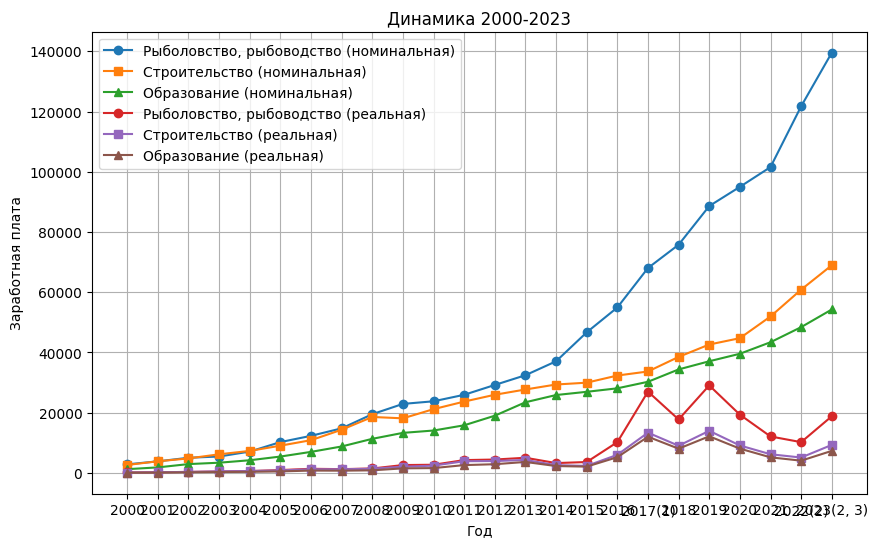

In [7]:
# Данные для графика
years = df.index
fishery = df['Рыболовство, рыбоводство']
construction = df['Строительство']
education = df['Образование']
fishery_infl = df['Рыболовство, рыбоводство'] / df['Коэффициент инфляции']
construction_infl = df['Строительство'] / df['Коэффициент инфляции']
education_infl = df['Образование'] / df['Коэффициент инфляции']

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(years, fishery, label='Рыболовство, рыбоводство (номинальная)', marker='o')
plt.plot(years, construction, label='Строительство (номинальная)', marker='s')
plt.plot(years, education, label='Образование (номинальная)', marker='^')

plt.plot(years, fishery_infl, label='Рыболовство, рыбоводство (реальная)', marker='o')
plt.plot(years, construction_infl, label='Строительство (реальная)', marker='s')
plt.plot(years, education_infl, label='Образование (реальная)', marker='^')

# Настройки графика
plt.xlabel('Год')
plt.ylabel('Заработная плата')
plt.title('Динамика 2000-2023')
plt.xticks(years)
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()

### Анализ данных о изменении номинальной и реальной заработной платы с 2000 по 2023 год:

***Инфляционное воздействие***: Графики позволяют наглядно оценить влияние инфляции на заработную плату. Видно, что номинальная заработная плата значительно увеличилась со временем, но при этом реальная заработная плата росла менее значительно в связи с влиянием инфляции.

***Тенденции в изменении заработной платы***: Анализ показывает, что заработная плата увеличивалась, но не в полной мере компенсировала воздействие инфляции. Однако, в 2017 и 2019 годах были периоды с низкой инфляцией, что привело к более значительному росту реальной заработной платы.

***Тенденции в изменении заработной платы за последний год***
- ***Рыболовство и Рыбоводство***
В период с 2022 по 2023 год покупательская способность (реальная заработная плата) в данной отрасли выросла на 84%.
- ***Строительство***
За тот же период покупательская способность в сфере строительства увеличилась на 82%.
- ***Образование***
В образовательной сфере наблюдался также значительный рост заработной платы, а именно на 80%.

Видно, что за последний год произошел заметный рост покупательской способности в указанных отраслях. Это может свидетельствовать о улучшении экономической ситуации в стране.
Рост заработной платы в рыболовстве, рыбоводстве, строительстве и образовании может также отражать увеличение спроса на работников в этих сферах и повышение их статуса на рынке труда.
Эти данные могут также свидетельствовать о положительных тенденциях в экономике, что может оказать влияние на потребительскую активность и общую стабильность рынка труда в будущем.